In [1]:
import numpy as np
import pandas as pd
import glob
import os
import cmath
import datain

from decimal import *
from matplotlib import pyplot as plt
%reload_ext autoreload
%autoreload 2

In [3]:
#These will eventually be input variables 
IRR=100
P='P1' 
Ampstrt=1
Ampend=5
Ampa=np.r_[Ampstrt:Ampend+1]
path=r'G:/My Drive/UW Research/fr-XAS October 2018/Data/1% O2/0.5 Hz'
initfile=0
finfile=120
# filestr=str(P + ' '+str('%.3f'%float(A))+ ' '+"*0*.txt")
# filestr

In [ ]:
np.savetxt

In [4]:
%autoreload
Xrayraw=False
data=[]
for n in Ampa:
    if n == 1:
        print(n)
        data=np.array(datain.getdata(P,n,path,initfile,finfile,False,Xrayraw))
        fa=datain.getfreq(P,n,path)
        print(np.shape(data),fa)#,data[3,525])
    else:
        print(n)
        data=np.concatenate((data,datain.getdata(P,n,path,initfile,finfile,False,Xrayraw)),axis=2)
        print(np.shape(data))#,data[3,525])
    if Xrayraw==False:
        data[1,:,n-1]=data[1,:,n-1]-np.mean(data[1,:,n-1]) #X-ray ratio data channel
        data[2,:,n-1]=(data[2,:,n-1]-np.mean(data[2,:,n-1]))/IRR #Current data channel
        data[3,:,n-1]=data[3,:,n-1]-np.mean(data[3,:,n-1]) #Voltage data channel
    else:
        data[1,:,n-1]=data[1,:,n-1]-np.mean(data[1,:,n-1]) #X-ray incident data channel
        data[2,:,n-1]=data[2,:,n-1]-np.mean(data[2,:,n-1]) #X-ray fluoresced data channel
        data[3,:,n-1]=(data[3,:,n-1]-np.mean(data[3,:,n-1]))/IRR #Current data channel
        data[4,:,n-1]=data[4,:,n-1]-np.mean(data[4,:,n-1]) #Voltage data channel

Ns=data[1,:,0].size
dt=data[0,1,0]
data[0,-1,0]

1
(4, 252000, 1) [0.500001]
2
(4, 252000, 2)
3
(4, 252000, 3)
4
(4, 252000, 4)
5
(4, 252000, 5)


239.99880761999998

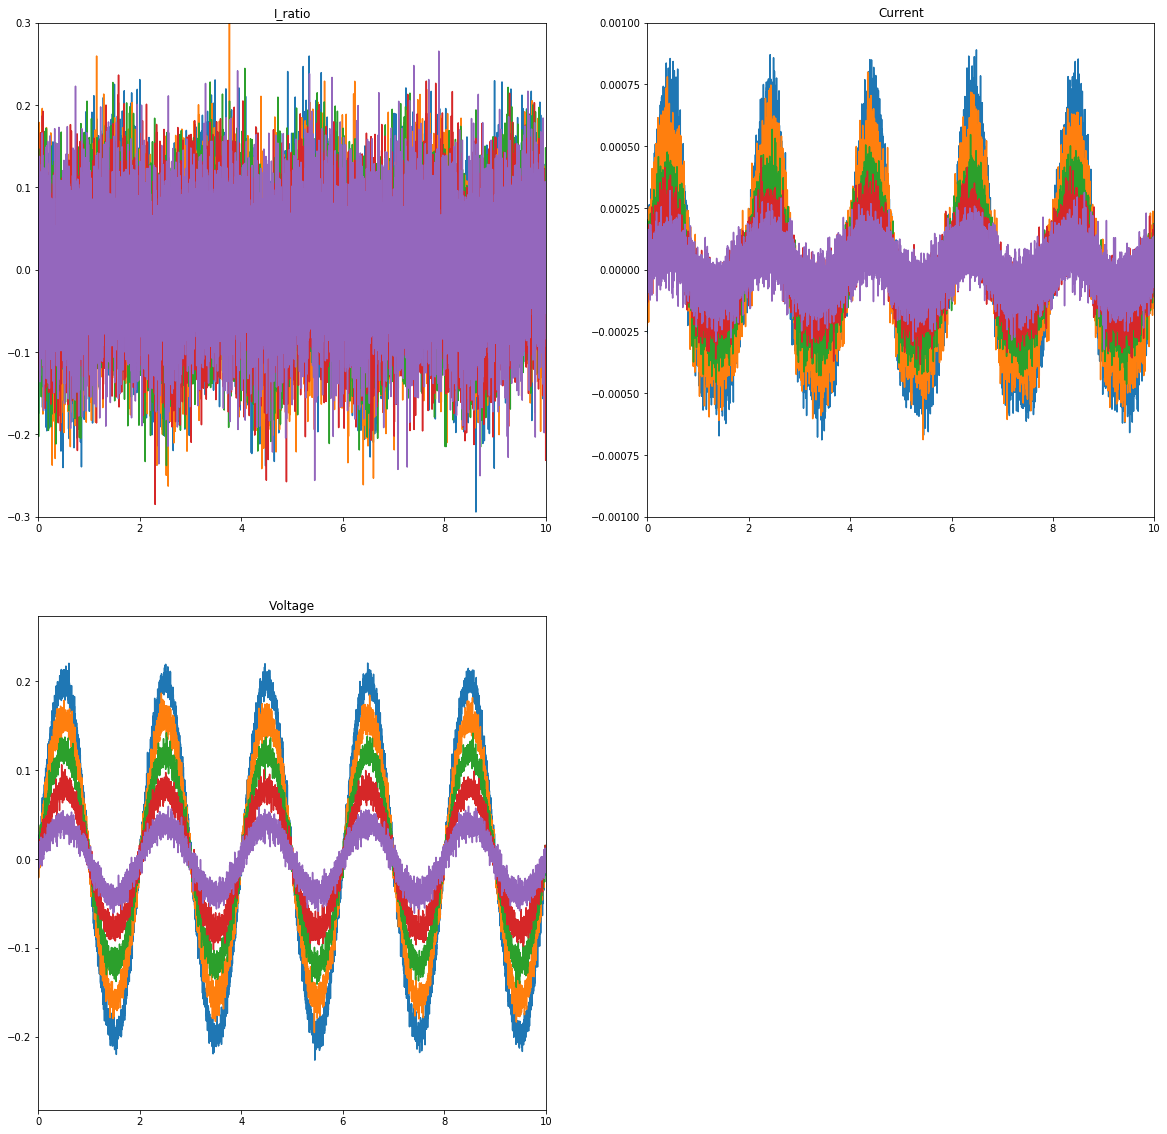

In [89]:
##Visualizing data signals in time domain for all amplitudes
%autoreload 2
#
datadum=data


#print(np.shape(datadum),np.shape(dfuncdum),datadum[0,:,0])
fig=plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax1.plot(datadum[0,:,:],datadum[1,:,:])
ax1.set_xlim(0,10)
ax1.set_ylim(-.3,.3)
ax1.set_title('I_ratio')

ax1 = fig.add_subplot(222)
ax1.plot(datadum[0,:,:],datadum[2,:,:])
ax1.set_xlim(0,10)
ax1.set_title('Current')
ax1.set_ylim(-1e-3,1e-3)

ax1 = fig.add_subplot(223)
ax1.plot(datadum[0,:,:],datadum[3,:,:])
ax1.set_xlim(0,10)
ax1.set_title('Voltage')
# ax1.set_ylim(0,.3)
plt.show()
#print(np.shape(datadum),np.shape(dfuncdum),dfuncdum)

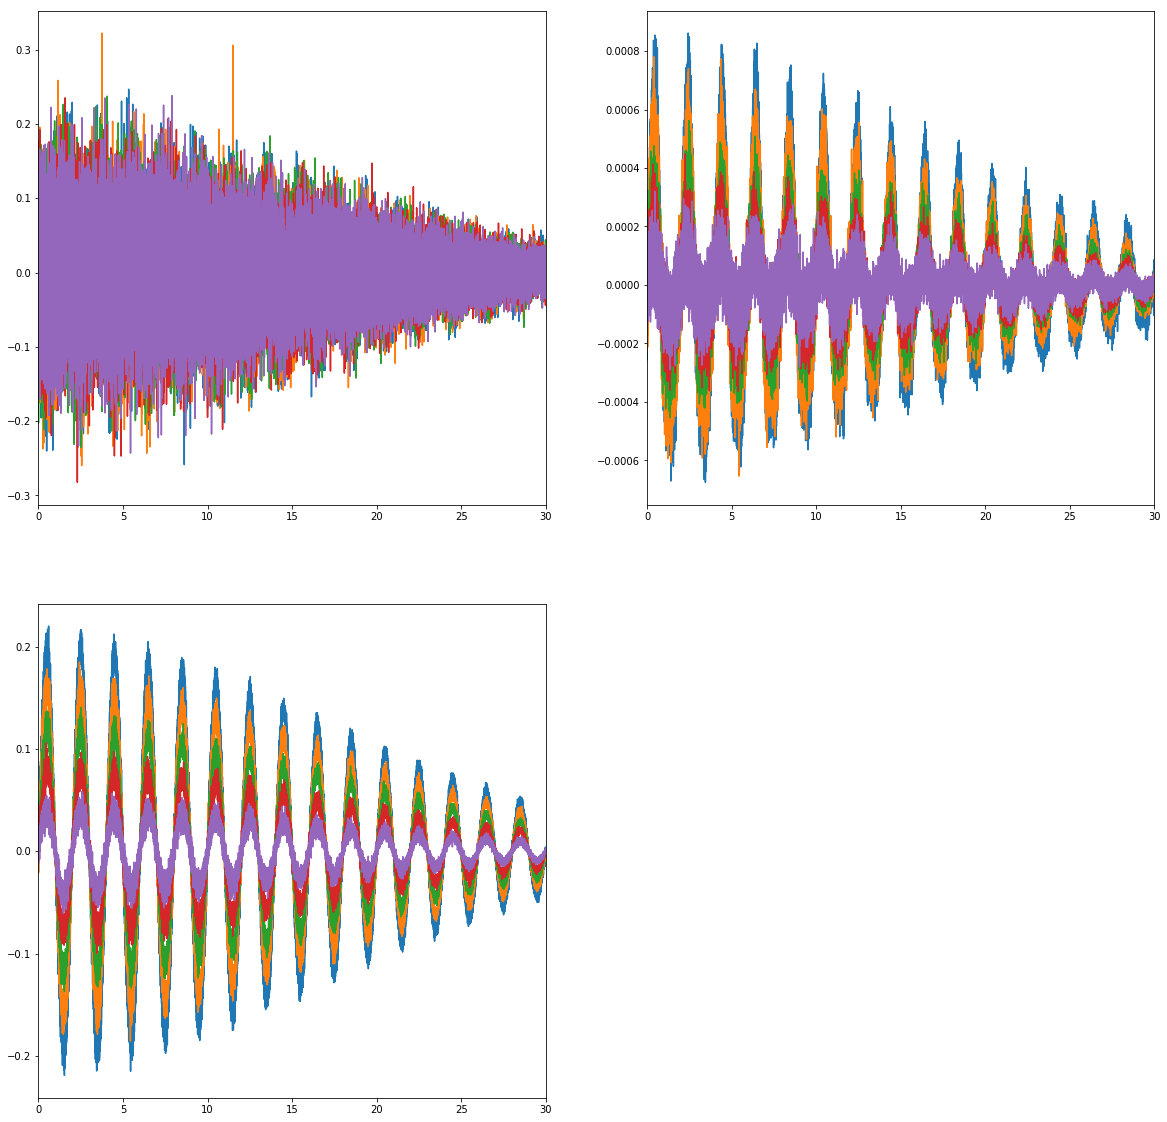

In [88]:
## Applying apodization window to all data signals and 
## and visualizing in time domain

%autoreload 2
b=7.5
dataD,dfunc=datain.Dawsonapp(12,fa,data)

fig=plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax1.plot(data[0,:,:],np.real(dataD[1,:]))
ax1.set_xlim(0,30)


ax1 = fig.add_subplot(222)
ax1.plot(data[0,:,:],np.real(dataD[2,:]))
ax1.set_xlim(0,30)
# ax1.set_ylim(-0.0001,.0001)

ax1 = fig.add_subplot(223)
ax1.plot(data[0,:,:],np.real(dataD[3,:]))
ax1.set_xlim(0,30)
#ax1.set_ylim(-0.015,.015)

plt.show()

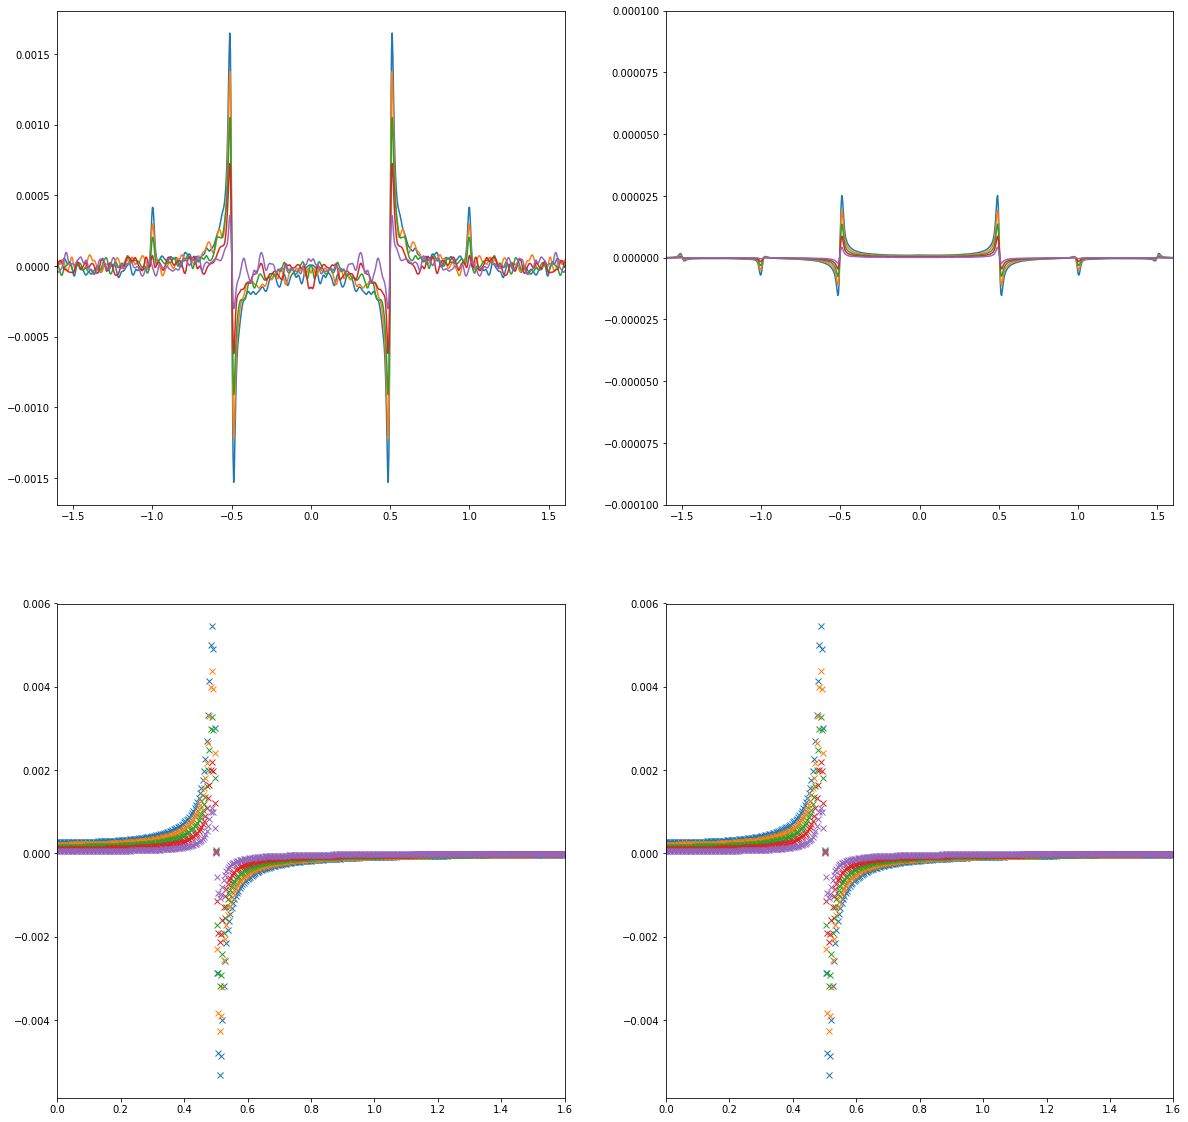

125879
0.4875004875004876 [0.00545564-0.00362964j 0.00436801-0.00290409j 0.00327534-0.00217681j
 0.00218381-0.00144918j 0.00109126-0.00072667j]


In [90]:
##Applying FFt to apodized data signals and visualizing frequency domain

freq,datafftdum=datain.getfft(dataD,Xrayraw)

datafft=datafftdum[:,:,:]

ifreq=np.fft.ifftshift(freq)
idatafft=np.fft.ifftshift(datafft)
idataD=np.fft.ifft(idatafft)

#print(np.shape(ifreq),np.shape(idatafft),np.shape(idataD),np.shape(data)[1])
#print(np.shape(datafft))

fig=plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax1.plot(freq,np.real(datafft[1,:]))
ax1.set_xlim(-1.6,1.6)


ax1 = fig.add_subplot(222)
ax1.plot(freq,np.real(datafft[2,:]))
ax1.set_xlim(-1.6,1.6)
ax1.set_ylim(-0.0001,.0001)

ax1 = fig.add_subplot(223)
ax1.plot(freq,np.real(datafft[3,:]),'x')
ax1.set_xlim(0,1.6)
#ax1.set_ylim(-0.015,.015)

ax1 = fig.add_subplot(224)
ax1.plot(freq,np.real(datafft[3,:]),'x')
ax1.set_xlim(0,1.6)
plt.show()
print(int(datain.fftbin(.5001,freq,Ns,dt,"Real",1)[0]))
print(freq[int(datain.fftbin(.5001,freq,Ns,dt,"Real",1)[1]-3)],datafft[3,int(datain.fftbin(.5001,freq,Ns,dt,"Real",1)[1]-3)])

(4, 252000, 5)


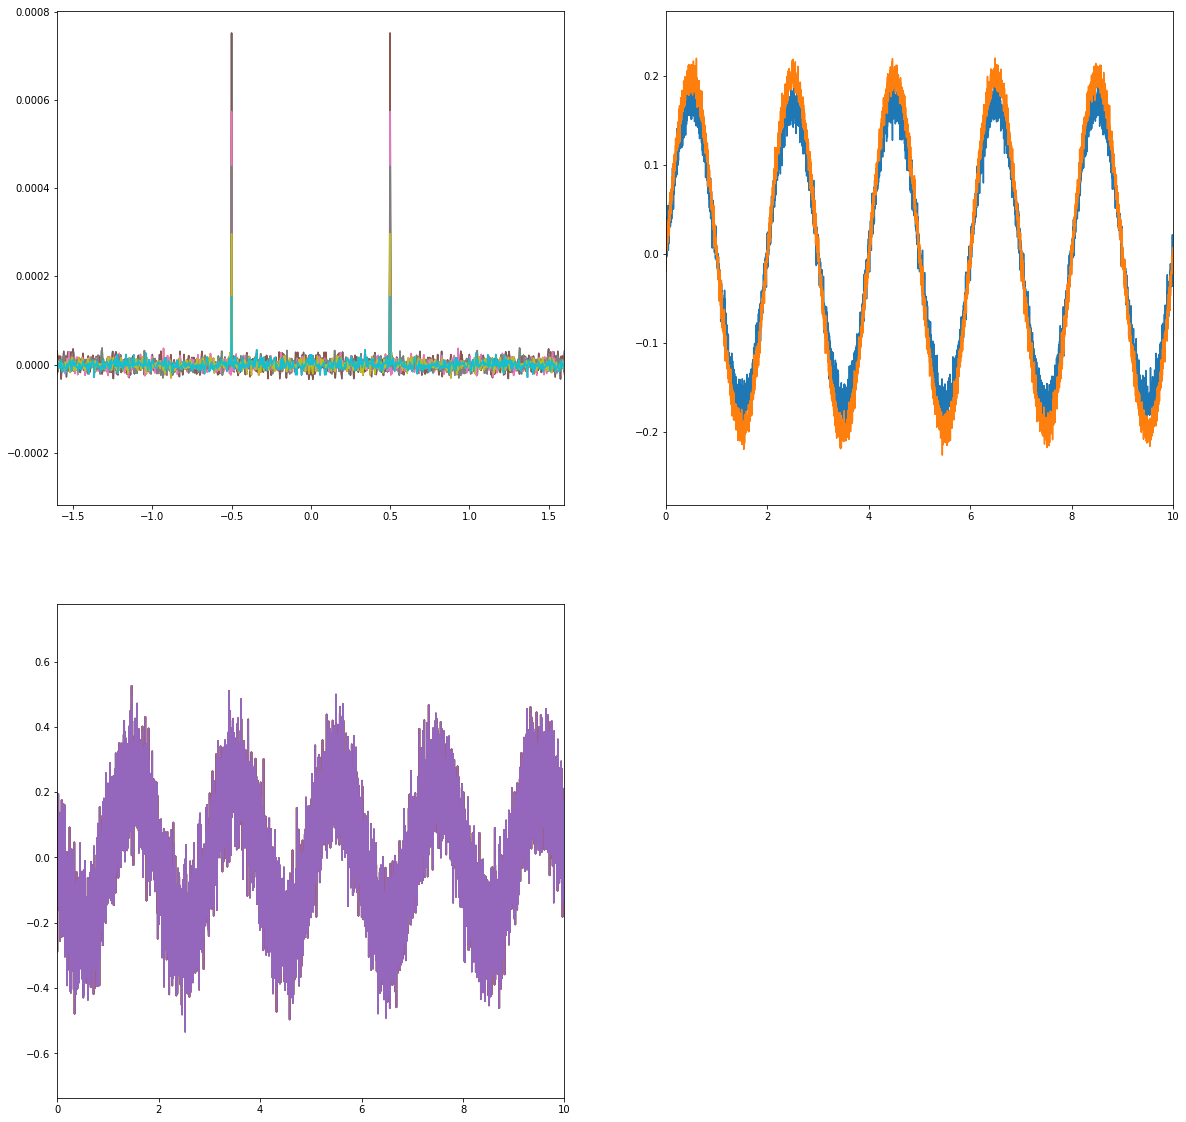

125879
0.4875004875004876 [1.33028129e-06-8.40515994e-05j 1.79736705e-05-5.39926012e-05j
 2.02305143e-05-4.77973818e-05j 6.47715011e-07-3.08778124e-05j
 7.25428176e-06-1.36812781e-05j]


In [110]:
##Applying FFt to  non-apodized data signals and visualizing frequency domain

freq,datafftnon=datain.getfft(data,Xrayraw)
print(datafftnon.shape)
datafft=datafftnon[:,:,:]

ifreq=np.fft.ifftshift(freq)
idatafftnon=np.fft.ifftshift(datafftnon)
idatanon=np.fft.ifft(idatafftnon[1:,:,0])*np.shape(data)[1]

#print(np.shape(ifreq),np.shape(idatafft),np.shape(idataD),np.shape(data)[1])
#print(np.shape(datafft))

fig=plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax1.plot(freq,np.real(datafftnon[3,:]),freq,np.real(datafftnon[3,:]))
ax1.set_xlim(-1.6,1.6)


ax1 = fig.add_subplot(222)
ax1.plot(data[0,:,0],idatanon[0,:],data[0,:,0],data[3,:,0])
ax1.set_xlim(0,10)
# ax1.set_ylim(-0.0001,.0001)

ax1 = fig.add_subplot(223)
ax1.plot(data[0,:,:],idatanon[2,:]-data[3,:,0])
ax1.set_xlim(0,10)
# #ax1.set_ylim(-0.015,.015)

# ax1 = fig.add_subplot(224)
# ax1.plot(freq,np.real(datafft[3,:]),'x')
# ax1.set_xlim(0,1.6)
plt.show()
print(int(datain.fftbin(.5001,freq,Ns,dt,"Real",1)[0]))
print(freq[int(datain.fftbin(.5001,freq,Ns,dt,"Real",1)[1]-3)],datafft[3,int(datain.fftbin(.5001,freq,Ns,dt,"Real",1)[1]-3)])

In [47]:
freq[int(bin1[0])]

-0.5000005000005001

In [54]:
fftang=np.angle(datafft)
fftmag=np.abs(datafft)
bin1=datain.fftbin(0.5,freq,Ns,dt,"Real",1)
angadj=np.angle(datafft[3,int(bin1[1])])

fftang2=fftang

fftang2[:,int(Ns/2):]=fftang[:,int(Ns/2):]-angadj #adjusting positive frequencies
fftang2[:,:int(Ns/2)]=fftang[:,:int(Ns/2)]+angadj #adjusting negative frequencies

datafft2=datain.P2R(fftmag,fftang2)
print(np.shape(fftang),np.angle(datafft[3,int(bin1[0])]),np.angle(datafft[3,int(bin1[1])]),freq[int(bin1[0])],angadj,np.angle(datafft2[3,int(bin1[0])])) 

(4, 252000, 5) [1.56270311 1.56282777 1.56236387 1.56202581 1.5619628 ] [-1.56270311 -1.56282777 -1.56236387 -1.56202581 -1.5619628 ] -0.5000005000005001 [-1.56270311 -1.56282777 -1.56236387 -1.56202581 -1.5619628 ] [0. 0. 0. 0. 0.]


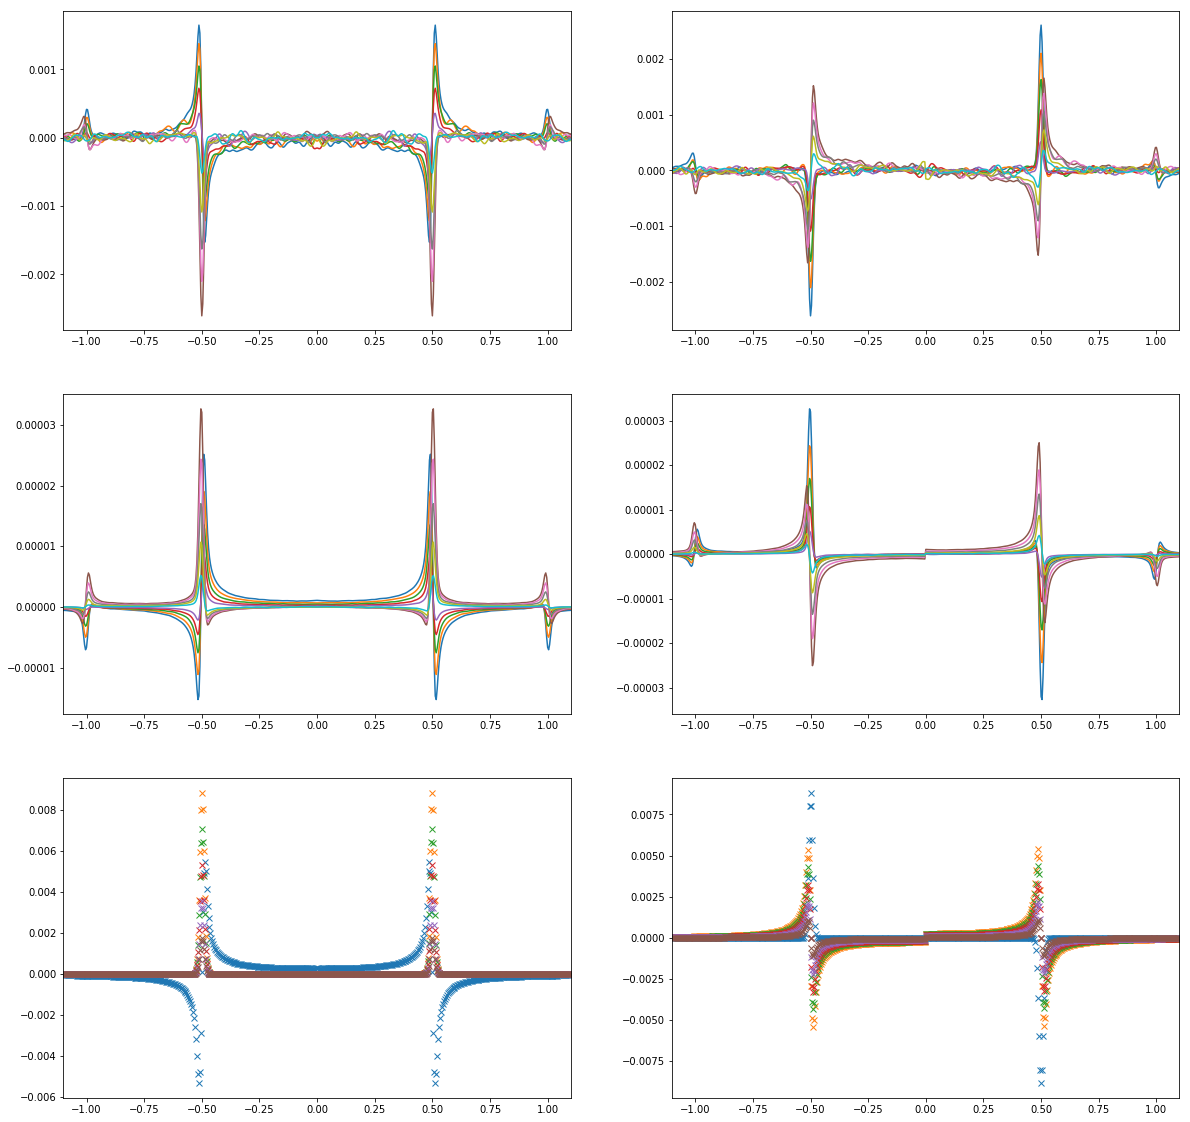

In [55]:
graphxlow=-1.1
graphxhi=1.1

fig=plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(321)
ax1.plot(freq,np.real(datafft[1,:]),freq,np.real(datafft2[1,:]))
ax1.set_xlim(graphxlow,graphxhi)

ax1 = fig.add_subplot(322)
ax1.plot(freq,np.imag(datafft[1,:]),freq,np.imag(datafft2[1,:]))
ax1.set_xlim(graphxlow,graphxhi)

ax1 = fig.add_subplot(323)
ax1.plot(freq,np.real(datafft[2,:]),freq,np.real(datafft2[2,:]))
ax1.set_xlim(graphxlow,graphxhi)
#ax1.set_ylim(graphlow,graphhi)

ax1 = fig.add_subplot(324)
ax1.plot(freq,np.imag(datafft[2,:]),freq,np.imag(datafft2[2,:]))
ax1.set_xlim(graphxlow,graphxhi)
#ax1.set_ylim(graphlow,graphhi)

ax1 = fig.add_subplot(325)
ax1.plot(freq,np.real(datafftdum[3,:,0]),'x',freq,np.real(datafft2[3,:]),'x')
ax1.set_xlim(graphxlow,graphxhi)
#ax1.set_ylim(-0.015,.015)

ax1 = fig.add_subplot(326)
ax1.plot(freq,np.imag(datafftdum[3,:,0]),'x',freq,np.imag(datafft2[3,:]),'x')
ax1.set_xlim(graphxlow,graphxhi)
#ax1.set_ylim(-0.015,.015)

plt.show()

In [38]:
np.mean(np.real(datafft2[1,:]))

2.0075594876866804e-08

In [77]:

print(ifreq[0],idatafft[3,0,:])

0.0 [ 6.67932895e-08+7.92078535e-06j -1.31586351e-06-1.50028742e-04j
  2.98246654e-07+3.37621644e-05j  3.88993419e-08+4.80630562e-06j
 -3.94294980e-07-4.94802780e-05j]


[ 0.          0.00416667  0.00833334 ... -0.01250001 -0.00833334
 -0.00416667] (4, 252000, 5)


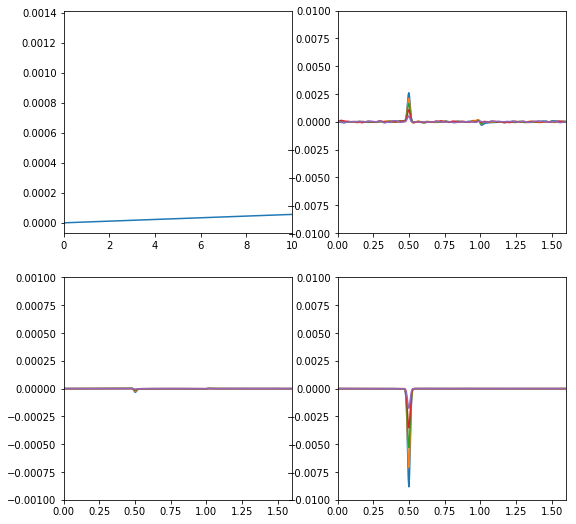

In [82]:
ifreq=np.fft.ifftshift(freq)
idatafft2=np.fft.ifftshift(datafft2)
idataD=np.fft.ifft(idatafft2,axis=1)

print(ifreq,np.shape(idatafft))

fig=plt.figure(figsize=(9,9))
ax1 = fig.add_subplot(221)
ax1.plot(dataD[0,:,0],idataD[2,:,0])
ax1.set_xlim(0,10)
#ax1.set_ylim(-0.01,.01)

ax1 = fig.add_subplot(222)
ax1.plot(freq,np.imag(datafft[1,:,:]))
ax1.set_xlim(0,1.6)
ax1.set_ylim(-0.01,.01)

ax1 = fig.add_subplot(223)
ax1.plot(freq,np.imag(datafft[2,:,:]))
ax1.set_xlim(0,1.6)
ax1.set_ylim(-0.001,.001)

ax1 = fig.add_subplot(224)
ax1.plot(freq,np.imag(datafft[3,:,:]))
ax1.set_xlim(0,1.6)
ax1.set_ylim(-0.01,.01)


plt.show()

In [ ]:
def fitfun(Cyc,k,f):
    

(3, 252000) [[ 0.          0.4552527   0.15287309 ...  0.28090431 -0.15287309
  -0.4552527 ]
 [ 3.14159265  2.92487879  2.75827302 ... -2.70169772 -2.75827302
  -2.92487879]
 [ 3.14159265  2.89772287  2.6871027  ... -2.54893978 -2.6871027
  -2.89772287]] 1.5627031060135332 -1.5627031060135332 -0.5000005000005001 -1.5627031060135332


IndexError: index 3 is out of bounds for axis 0 with size 3

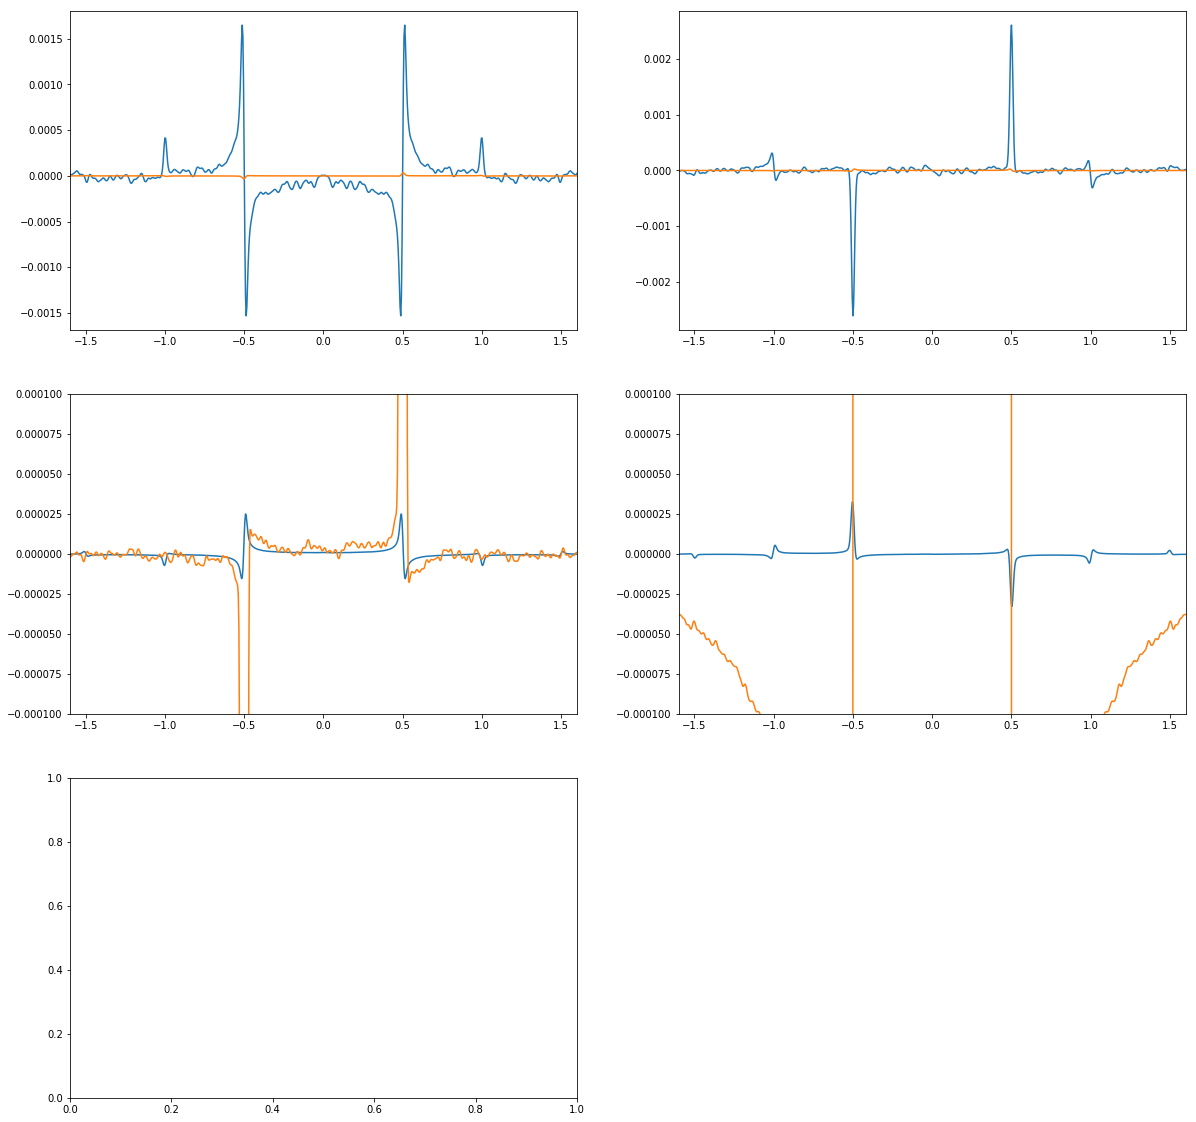

In [11]:
fftang2=np.zeros(np.shape(fftang))
print(np.shape(fftang2), datain.fftbin(fa,freq,Ns,dt,"Combo",2))

(3, 42000, 5) [[10479. 20979.]
 [10520. 21020.]
 [10459. 20959.]
 [10540. 21040.]]


In [45]:
def Dawsonbb(b,appfreq,data):
    dataD=np.array(data[0,:,:],ndmin=3)
    Dfunc=np.array(np.exp(-(appfreq*data[0,:,:]/b)**2),ndmin=3)
    dataD=data[1:,:,:]*Dfunc
    dataD=np.append(np.array(data[0,:,:],ndmin=3),dataD,axis=0)
    #print(np.shape(data[0,:,:]),np.shape(dataD))#, np.shape(dataD))
    return dataD

dumbb=Dawsonbb(b,fa,data)
#dumbb2=np.append(np.array(data[0,:,:],ndmin=3),dumbb,axis=0)
#print(np.shape(np.array(data[0,:,:],ndmin=3)),np.shape(dumbb), dumbb[3,:,0])#,np.shape(dumbb2),dumbb2[0,:,0])

In [57]:
for n in range(np.shape(fftang)[0]):
    print(n)
    angadj=np.angle(datafft[3,int(bin1[0]),n])
    print(angadj)
    fftang2=fftang[:,:,]

0
1.569746448197203
1
1.5700211310561007
2
1.5697535381924965


In [54]:
angadj=np.angle(datafft[3,int(bin1[0]),0])
fftang2=fftang[:,:,0]-angadj

print(np.shape(fftang2))
print(fftang2[2,int(bin1[0])])


(3, 42000)
0.0


In [49]:
print(int(bin1[0]))
print(fftang[2,int(bin1[0]),0],np.angle(datafft[3,int(bin1[0]),0]),datafft[3,int(bin1[0]),0])
print(np.abs(datafft[3,int(bin1[0]),0]),datafft[3,int(bin1[0]),0])

20980
1.569746448197203 1.569746448197203 (0.00020923264987327242+0.19929215954843346j)
0.19929226938288408 (0.00020923264987327242+0.19929215954843346j)


In [153]:
Vpol=[]
Vang=np.angle(Vfft)
Jang=np.angle(Jfft)
Iang=np.angle(Ifft)

Vmag=np.abs(Vfft)
Jmag=np.abs(Jfft)
Imag=np.abs(Ifft)

Vang2=Vang-Vang[bin1]
Jang2=Jang-Vang[bin1]
Iang2=Iang-Vang[bin1]

Vfft2=P2R(Vmag,Vang2)
Jfft2=P2R(Jmag,Jang2)
Ifft2=P2R(Imag,Iang2)
##Should write function to phase adjust. Include option for harmonics adjustment too(?)
print(np.abs(Vfft[bin1]),np.angle(Vfft[bin1]),Vfft[bin1])
print(np.abs(Vfft2[bin1]),np.angle(Vfft2[bin1]),Vfft2[bin1])

0.19931272134526823 -1.5654663926613661 (0.001062318646968624-0.19930989029435756j)
0.19931272134526823 0.0 (0.19931272134526823+0j)


In [151]:
print(Vfft[120],Vfft2[120],np.abs([Vfft[120],Vfft2[120]]))
print(Jfft[120],Jfft2[120],np.abs([Jfft[120],Jfft2[120]]))
print(Ifft[120],Ifft2[120],np.abs([Ifft[120],Ifft2[120]]))

(1.232992875423998e-05+9.280547935001475e-08j) (1.3768088292014366e-06+1.2253169116170077e-05j) [1.2330278e-05 1.2330278e-05]
(-9.210821322042085e-06-5.883555315723776e-07j) (-5.131864220552318e-07-9.215315043683262e-06j) [9.22959326e-06 9.22959326e-06]
(0.0001626990662214031-6.449442699906487e-05j) (8.34185978195943e-05+0.00015385660467158048j) [0.00017502 0.00017502]


In [408]:
print(Vang[120])
print(Jang[120])
print(Iang[120])
np.ex

-1.5654663926613661
-1.2337790006640572
1.4939701108041392


In [150]:
print(bin1)

126120


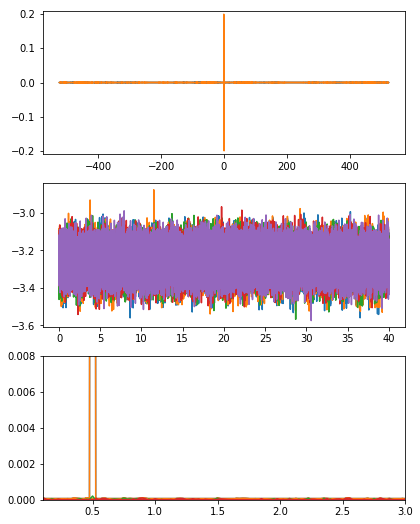

In [60]:
fig=plt.figure(figsize=(6.5,9))
ax1 = fig.add_subplot(311)
# ax1.plot(t[:,1],V[:,1],t[:,0],J[:,0])
ax1.plot(freq,Vfft.real,freq,Vfft2.real)
#ax1.set_xlim(-3,3)
ax1.set_ylim(-.21,.21)

if Xrayraw==True:   
    ax2=fig.add_subplot(312)
    ax2.plot(t,Io,t,If,t,Ir)
else:
    ax2=fig.add_subplot(312)
    ax2.plot(t,Ir)

ax3=fig.add_subplot(313)
ax3.plot(freq,np.abs(Vfft),freq,np.abs(Vfft2),freq,Vfft.real,freq,Vfft2.real)
ax3.set_xlim(0.1,3)
ax3.set_ylim(0,.008)
plt.show()


In [37]:
np.size(freq)

39900

In [263]:
filestr=str(P + ' ' + str('%.3f'%float(1)) + ' '+ "*.txt")
#Making array of strings to help pandas find all data files
# for a single measured amplitude and location (point)
all_files=glob.glob(os.path.join(path,P, filestr))
all_files
len(all_files)

121

In [284]:
np.sqrt(V[:,0].size)/2

250.99800796022265

In [287]:
%%timeit [-n]
Vfft=np.fft.fft(V[:,1])/(V[:,0].size/2)

12 ms ± 1.37 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [381]:
%%timeit [-n]
Vfft=np.fft.fft(Ir[:,0])/ns

15.1 ms ± 4.57 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [289]:
ns=V[:,0].size/2

In [347]:
Vfft.size
print(Vfft[-120].imag,Vfft[120].imag,np.shape(Vfft))

0.1594757843185224 -0.1594757843185224 (252000,)


In [370]:
Vfft_fi=np.zeros((1,Vfft.size))
Vfft_fi=Vfft_fi+1j*Vfft_fi
Vfft_fi[0,-120]=np.complex(Vfft[-120].real,Vfft[-120].imag)
Vfft_fi[0,120]=np.complex(Vfft[120].real,Vfft[120].imag)
Vfft_fi[0,120]

(0.00081105666507623-0.1594757843185224j)

In [372]:
Vifft=np.fft.ifft(Vfft_fi)*ns
Vifft.resize(V[:,0].size)


print(np.shape(Vifft),np.shape(V[:,0]))

(252000,) (252000,)


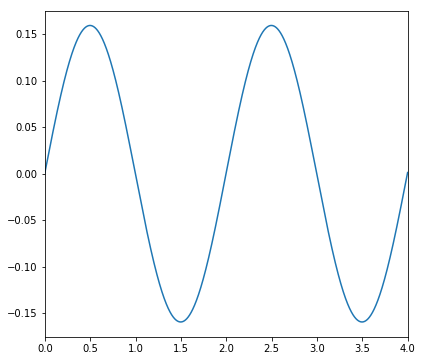

In [380]:
fig=plt.figure(figsize=(6.5,6))
ax1 = fig.add_subplot(111)
ax1.plot(t[:,1],Vifft)
ax1.set_xlim(0,4)

plt.show()

In [117]:
np.shape(data)

(4, 252000, 5)

In [197]:
def multreturn(a,b):
    aa=np.array(a)
    arr1=np.tile(aa,b)
    arr1.resize(b,1)
    arr2=np.tile(aa+1,b)
    arr2.resize(b,1)
    con=np.array(5,ndmin=2)
    return arr1, arr2

In [198]:
duma=np.array(multreturn(2,3))
print(duma,np.shape(duma))

[[[2]
  [2]
  [2]]

 [[3]
  [3]
  [3]]] (2, 3, 1)


In [199]:
for n in Ampa:
    if n == 1:
        print(n)
        duma=np.array(multreturn(n,3))
        print(np.shape(duma))
    else:
        print(n)
        duma=np.concatenate((duma,multreturn(n,3)),axis=2)
        print(np.shape(duma))

1
(2, 3, 1)
2
(2, 3, 2)
3
(2, 3, 3)
4
(2, 3, 4)
5
(2, 3, 5)
